In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import random as rand
import cv2
import glob
r = rand.Random()

# Part 2 MNIST HANDWRITTEN DIGITS CLASSIFICATION

In [2]:
#creating a Linear Regression class
class LinearRegression:
    
    def __init__(self, file_name = "", alpha= 0.0005, tolerance = 0.001, max_iter = 10000):
        self.file_name = file_name
        self.alpha = alpha
        self.tolerance = tolerance
        self.max_iter = max_iter
        
        #prepare data
        self.data = pd.read_csv(self.file_name) #read csv file
        self.x = self.data.iloc[:,:-1] #separate all x features 
        ones = pd.DataFrame(np.ones(self.data.iloc[:, -1:].shape[0])) #make x_0 = 1 
        self.x = pd.concat([ones,self.x], axis=1) #add x_0 to the x features
        self.x = np.asmatrix(self.x)
        self.y = np.asmatrix(self.data.iloc[:, -1:])
        
    
        
        #generate random theta
        self.theta = np.asmatrix((2*np.random.rand(self.x.shape[1]))-1).T
        
        self.h = None
        self.hy_diff = None
        self.j = None
        self.gradient = None
        
        #make an initial list where you append J
        self.cost = []
    
    # Compute hypothesis function 
    def eval_h(self):
        self.h = np.dot(self.x,self.theta)
    
    # Compute cost function 
    def eval_j(self):
        self.hy_diff = self.h - self.y
        self.j = (1/(2*self.y.shape[0]))* np.dot(self.hy_diff.T, self.hy_diff)[0,0]
        
    # Compute the gradient of J
    def gradient_j(self):
        self.gradient = (1/self.y.shape[0])* np.dot(self.x.T, self.hy_diff)
     
    # Update equation for gradient descent
    def update_theta(self):
        self.theta = self.theta - self.alpha * self.gradient
    
    #Initiate regression
    def regression(self):
        for i in range(int(self.max_iter)):
            self.eval_h()
            self.eval_j()
            self.cost.append(self.j)
            self.gradient_j()
            self.update_theta()
            if i>0 and abs(self.cost[i]-self.cost[i-1])<= self.tolerance:
                print("Ending at iteration:", i+1)
                break
                 
                
    #plot results
    def graph(self,label=""):
        x = np.arange(0,len(self.cost),1)
        y = np.array(self.cost)
        plt.xlabel('Training iterations')
        plt.ylabel('Cost function')
        plt.grid()
        plt.plot(x, y, label=label)
        plt.show

In [3]:
#creating a Logistic Regression class using inheritance
class LogisticRegression(LinearRegression):
    
    def __init__(self, file_name = "", alpha = 0.0005, tolerance = 0.000001, max_iter = 10000):
        super().__init__(file_name, alpha, tolerance, max_iter)
        
    def regularize(self, Lambda, Type = 'L2'):
        self.regularized = False
        self.Lambda = Lambda
        self.Type = Type
        theta = self.theta[1:]
        if Type == 'L2' or Type == 'l2':
            self.reg = self.Lambda * (np.dot(theta.T,theta)[0,0])
        elif Type == 'L1' or Type == 'l1':
            self.reg = self.Lambda * (np.dot(ones, abs(theta))[0,0])
        self.regularized = True
        
    def eval_h(self):
        self.h = 1/(1+ np.exp(np.dot(self.x,self.theta)*-1))
        
    def eval_j(self):
        logh = np.log(self.h)
        log1h = np.log(1-self.h)
        ans = (np.dot(self.y.T, logh)[0,0] + np.dot(1-self.y.T, log1h)[0,0])*-1
        self.j = ans*(1/self.y.shape[0]) if not self.regularized else ((ans + (self.reg / 2))*(1/self.y.shape[0]))
    
    def gradient_j(self):
        hydiff = self.h - self.y
        zero = np.asmatrix([[0.]])
        theta = np.vstack((zero, self.theta[1:]))
        self.gradient0 = np.dot(self.x.T, hydiff)
        self.gradient = (self.gradient0*(1/self.y.shape[0])) if not self.regularized else (self.gradient0 + (self.Lambda * theta))*(1/self.y.shape[0])
        
    def update_theta(self):
        theta = self.theta[1:]*(1-(self.alpha*self.Lambda)/self.y.shape[0])-self.alpha*(self.gradient0[1:]/self.y.shape[0])
        theta0 = self.theta[0]-self.alpha*(self.gradient0[0]/self.y.shape[0])
        self.theta = np.vstack((theta0, theta))
        
    def classify(self, N = 0):
        for i in range(self.y.shape[0]):
            self.y[i,0] = 1 if self.y[i,0] == N else 0

#### 1. Once you have your best ensemble, save the weights of the models in a .csv file.

##### Creating Training CSV

glob() - the glob module is used to retrieve files/pathnames matching a specified pattern. <br>
<br>

cv2 - is a library of Python bindings designed to solve computer vision problems. <br>
cv2. imread(path,flag) method loads an image from the specified file. <br>
path = image path <br>
flag = specific way to read the image (0 = grayscale)

In [4]:
#read images
zero = []
for names0 in glob.glob('mnist_png/training/0/*'):
    zeroimg = cv2.imread(names0, 0)
    zero.append(zeroimg)
    
one = []
for names1 in glob.glob('mnist_png/training/1/*'):
    oneimg = cv2.imread(names1, 0)
    one.append(oneimg)
    
two = []
for names2 in glob.glob('mnist_png/training/2/*'):
    twoimg = cv2.imread(names2, 0)
    two.append(twoimg)
    
seven = []
for names7 in glob.glob('mnist_png/training/7/*'):
    sevenimg = cv2.imread(names7, 0)
    seven.append(sevenimg)
    
eight = []
for names8 in glob.glob('mnist_png/training/8/*'):
    eightimg = cv2.imread(names8, 0)
    eight.append(eightimg)

In [5]:
#choose random images from our list
randzero = []
for img in range(2000):
    i = r.randint(0, len(zero)-1)
    z = zero.pop(i).flatten()/255.
    randzero.append(z)
    
randone = []
for img in range(2000):
    i = r.randint(0, len(one)-1)
    o = one.pop(i).flatten()/255.
    randone.append(o)
    
randtwo = []
for img in range(2000):
    i = r.randint(0, len(two)-1)
    t = two.pop(i).flatten()/255.
    randtwo.append(t)
    
randseven = []
for img in range(2000):
    i = r.randint(0, len(seven)-1)
    s = seven.pop(i).flatten()/255.
    randseven.append(s)
    
randeight = []
for img in range(2000):
    i = r.randint(0, len(eight)-1)
    e = eight.pop(i).flatten()/255.
    randeight.append(e)

In [6]:
#add a column for class in our new lists
zeroes = np.zeros([2000, 1])
randzero = np.hstack([np.asmatrix(randzero), zeroes])

ones = np.ones([2000, 1])
randone = np.hstack([np.asmatrix(randone), ones])

twos = 2*np.ones([2000, 1])
randtwo = np.hstack([np.asmatrix(randtwo), twos])

sevens = 7*np.ones([2000, 1])
randseven = np.hstack([np.asmatrix(randseven), sevens])

eights = 8*np.ones([2000, 1])
randeight = np.hstack([np.asmatrix(randeight), eights])

#join all classes and save to a csv
classes = np.vstack([randzero, randone, randtwo, randseven, randeight])
pd.DataFrame(classes).to_csv('train.csv', index = False)

In [33]:
pd.DataFrame(classes).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 59.9 MB


##### Creating Testing CSV

In [7]:
#read images
tzero = []
for names0 in glob.glob('mnist_png/testing/0/*'):
    zeroimg=cv2.imread(names0, 0)
    tzero.append(zeroimg)
    
tone = []
for names1 in glob.glob('mnist_png/testing/1/*'):
    oneimg=cv2.imread(names1, 0)
    tone.append(oneimg)
    
ttwo = []
for names2 in glob.glob('mnist_png/testing/2/*'):
    twoimg=cv2.imread(names2, 0)
    ttwo.append(twoimg)
    
tseven = []
for names7 in glob.glob('mnist_png/testing/7/*'):
    sevenimg=cv2.imread(names7, 0)
    tseven.append(sevenimg)
    
teight = []
for names8 in glob.glob('mnist_png/testing/8/*'):
    eightimg=cv2.imread(names8, 0)
    teight.append(eightimg)

In [8]:
#choose random images from our list
randtzero = []
for img in range(200):
    i = r.randint(0, len(tzero)-1)
    z = zero.pop(i).flatten()/255.
    randtzero.append(z)
    
randtone = []
for img in range(200):
    i = r.randint(0, len(tone)-1)
    o = one.pop(i).flatten()/255.
    randtone.append(o)
    
randttwo = []
for img in range(200):
    i = r.randint(0, len(ttwo)-1)
    t = two.pop(i).flatten()/255.
    randttwo.append(t)
    
randtseven = []
for img in range(200):
    i = r.randint(0, len(tseven)-1)
    s = seven.pop(i).flatten()/255.
    randtseven.append(s)
    
randteight = []
for img in range(200):
    i = r.randint(0, len(teight)-1)
    e = eight.pop(i).flatten()/255.
    randteight.append(e)

In [9]:
#add a column for class in our new lists
zeroes = np.zeros([200, 1])
randtzero = np.hstack([np.asmatrix(randtzero), zeroes])

ones = np.ones([200, 1])
randtone = np.hstack([np.asmatrix(randtone), ones])

twos = 2*np.ones([200, 1])
randttwo = np.hstack([np.asmatrix(randttwo), twos])

sevens = 7*np.ones([200, 1])
randtseven = np.hstack([np.asmatrix(randtseven), sevens])

eights = 8*np.ones([200, 1])
randteight = np.hstack([np.asmatrix(randteight), eights])

#join all classes and save to a csv
tclasses = np.vstack([randtzero, randtone, randttwo, randtseven, randteight])
pd.DataFrame(tclasses).to_csv('test.csv', index = False)

In [34]:
pd.DataFrame(tclasses).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 785 entries, 0 to 784
dtypes: float64(785)
memory usage: 6.0 MB


#### 2. For each model, plot the cost as a function of training iteration and compute the overall accuracy, precision, recall, and F1 score for the two classes.

##### Zero

In [10]:
#classifying the created csv
train0 = LogisticRegression('train.csv', alpha = 0.01)
train0.regularize(Lambda = 1)
test0 = LogisticRegression('test.csv', alpha = 0.01)
test0.regularize(Lambda = 1)

train0.classify(N = 0)
test0.classify(N = 0)

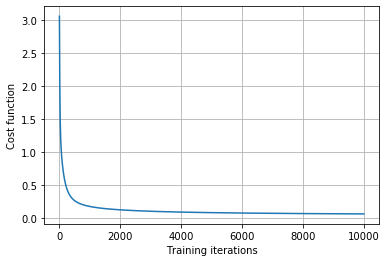

In [11]:
train0.regression()
train0.graph()

In [12]:
h = 1 / (1 + np.exp(-1 * np.dot(test0.x, train0.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0
print(classification_report(test0.y, h))

print('Confusion matrix:')
print(confusion_matrix(test0.y, h))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       800
         1.0       0.95      0.94      0.94       200

    accuracy                           0.98      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.98      0.98      0.98      1000

Confusion matrix:
[[790  10]
 [ 12 188]]


In [13]:
#saving theta for use in the overall classification report
pd.DataFrame(train0.theta).to_csv('zero.csv', index = False)

##### One

In [14]:
train1 = LogisticRegression('train.csv', alpha = 0.01)
train1.regularize(Lambda = 1)
test1 = LogisticRegression('test.csv', alpha = 0.01)
test1.regularize(Lambda = 1)

test1.classify(N = 1)
train1.classify(N = 1)

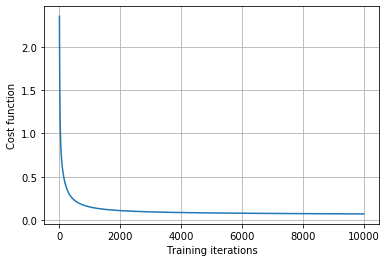

In [15]:
train1.regression()
train1.graph()

In [16]:
h = 1 / (1 + np.exp(-1 * np.dot(test1.x, train1.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0
print(classification_report(test1.y, h))

print('Confusion matrix:')
print(confusion_matrix(test1.y, h))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       800
         1.0       0.93      0.95      0.94       200

    accuracy                           0.98      1000
   macro avg       0.96      0.97      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Confusion matrix:
[[786  14]
 [ 10 190]]


In [17]:
pd.DataFrame(train1.theta).to_csv('one.csv', index = False)

##### Two

In [18]:
train2 = LogisticRegression('train.csv', alpha = 0.01)
train2.regularize(Lambda = 1)
test2 = LogisticRegression('test.csv', alpha = 0.01)
test2.regularize(Lambda = 1)

test2.classify(N = 2)
train2.classify(N = 2)

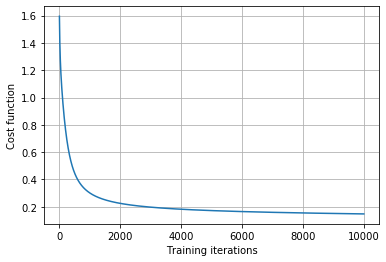

In [19]:
train2.regression()
train2.graph()

In [20]:
h = 1 / (1 + np.exp(-1 * np.dot(test2.x, train2.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0
print(classification_report(test2.y, h))

print('Confusion matrix:')
print(confusion_matrix(test2.y, h))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       800
         1.0       0.90      0.86      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.95      0.95      0.95      1000

Confusion matrix:
[[780  20]
 [ 28 172]]


In [21]:
pd.DataFrame(train2.theta).to_csv('two.csv', index = False)

##### Seven

In [22]:
train7 = LogisticRegression('train.csv', alpha = 0.01)
train7.regularize(Lambda = 1)
test7 = LogisticRegression('test.csv', alpha = 0.01)
test7.regularize(Lambda = 1)

test7.classify(N = 7)
train7.classify(N = 7)

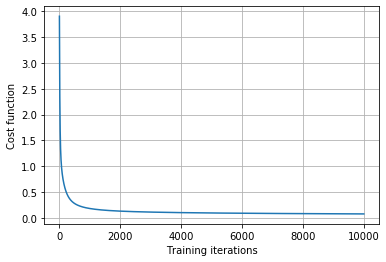

In [23]:
train7.regression()
train7.graph()

In [24]:
h = 1 / (1 + np.exp(-1 * np.dot(test7.x, train7.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0
print(classification_report(test7.y, h))

print('Confusion matrix:')
print(confusion_matrix(test7.y, h))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       800
         1.0       0.97      0.92      0.94       200

    accuracy                           0.98      1000
   macro avg       0.98      0.95      0.96      1000
weighted avg       0.98      0.98      0.98      1000

Confusion matrix:
[[795   5]
 [ 17 183]]


In [25]:
pd.DataFrame(train7.theta).to_csv('seven.csv', index = False)

##### Eight

In [26]:
train8 = LogisticRegression('train.csv', alpha = 0.01)
train8.regularize(Lambda = 1)
test8 = LogisticRegression('test.csv', alpha = 0.01)
test8.regularize(Lambda = 1)

test8.classify(N = 8)
train8.classify(N = 8)

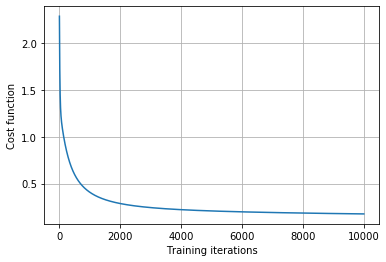

In [27]:
train8.regression()
train8.graph()

In [28]:
h = 1 / (1 + np.exp(-1 * np.dot(test8.x, train8.theta)))
h[h >= 0.5] = 1
h[h < 0.5] = 0
print(classification_report(test8.y, h))

print('Confusion matrix:')
print(confusion_matrix(test8.y, h))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97       800
         1.0       0.86      0.87      0.86       200

    accuracy                           0.94      1000
   macro avg       0.91      0.92      0.91      1000
weighted avg       0.95      0.94      0.95      1000

Confusion matrix:
[[771  29]
 [ 26 174]]


In [29]:
pd.DataFrame(train8.theta).to_csv('eight.csv', index = False)

#### 3. For the best ensemble, compute the overall accuracy, precision, recall, and F1 score for all classes.

In [30]:
test = LogisticRegression('test.csv')

#read data saved
c0 = np.asmatrix(pd.read_csv('zero.csv'))
c1 = np.asmatrix(pd.read_csv('one.csv'))
c2 = np.asmatrix(pd.read_csv('two.csv'))
c7 = np.asmatrix(pd.read_csv('seven.csv'))
c8 = np.asmatrix(pd.read_csv('eight.csv'))

#compute h using theta from data
h0 = 1/(1+ np.exp(np.matmul(test.x,c0)*-1))
h1 = 1/(1+ np.exp(np.matmul(test.x,c1)*-1))
h2 = 1/(1+ np.exp(np.matmul(test.x,c2)*-1))
h7 = 1/(1+ np.exp(np.matmul(test.x,c7)*-1))
h8 = 1/(1+ np.exp(np.matmul(test.x,c8)*-1))
combined = np.hstack((h0, h1, h2, h7, h8))

In [31]:
#classify
hcombined = (np.zeros(combined.shape[0]))
for i in range(combined.shape[0]):
    if combined[i, 0] > combined[i,1] and combined[i, 0] > combined[i, 2] and combined[i, 0] > combined[i, 3] and combined[i, 0] > combined[i, 4]:
        hcombined[i] = 0
    elif combined[i, 1] > combined[i, 2] and combined[i, 1] > combined[i, 3] and combined[i, 1] > combined[i, 4]:
        hcombined[i] = 1
    elif combined[i, 2] > combined[i, 3] and combined[i, 2] > combined[i, 4]:
        hcombined[i] = 2
    elif combined[i, 3] > combined[i, 4]:
        hcombined[i] = 7
    else:
        hcombined[i] = 8

print(classification_report(test.y, hcombined))
print(confusion_matrix(test.y,hcombined))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       200
         1.0       0.93      0.95      0.94       200
         2.0       0.93      0.90      0.91       200
         7.0       0.96      0.94      0.95       200
         8.0       0.90      0.93      0.91       200

    accuracy                           0.94      1000
   macro avg       0.94      0.93      0.93      1000
weighted avg       0.94      0.94      0.93      1000

[[192   0   2   1   5]
 [  0 191   5   0   4]
 [  4   5 179   5   7]
 [  1   2   4 188   5]
 [  4   7   2   2 185]]
